In [1]:
import pyarrow
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Negative random Control (Full to full protein)

In [21]:
input_filename = 'results/negative_controls_random/finches_interaction_neg-control_random_results.parquet'

df = pq.read_table(input_filename).to_pandas()
print(df.columns)

df_attractive = df[df['interaction_type'] == 'attraction']
df_repulsive = df[df['interaction_type'] == 'repulsion']

print(len(df_attractive))
print(len(df_repulsive))

Index(['s1_id', 's2_id', 'mf_s1_s2', 'mf_s2_s1', 'cf_s1_s2', 'cf_s2_s1',
       'mean_epsilon', 'std_epsilon', 'interaction_type'],
      dtype='object')
13440
1


In [22]:
df_na = df[df['interaction_type'] == 'N/A']
print(len(df_na))
na_viruses = df['s1_id'].unique()
print(len(na_viruses))

0
13441


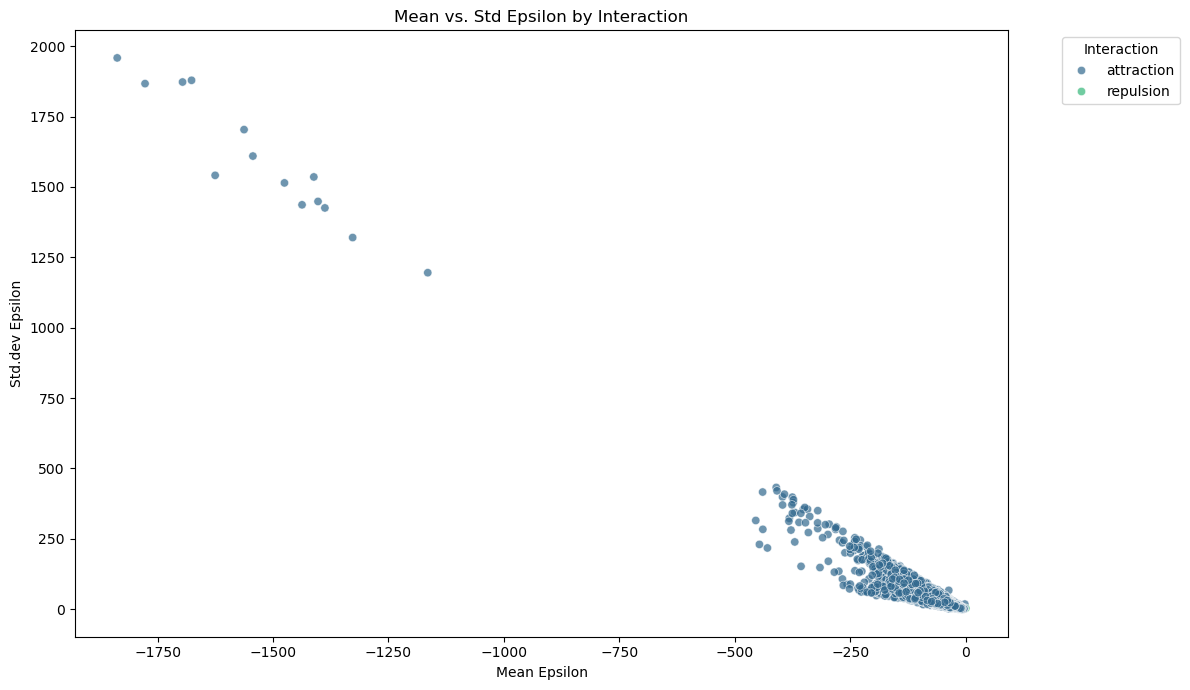

In [23]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='mean_epsilon', y='std_epsilon',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('Mean vs. Std Epsilon by Interaction')
plt.xlabel('Mean Epsilon')
plt.ylabel('Std.dev Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

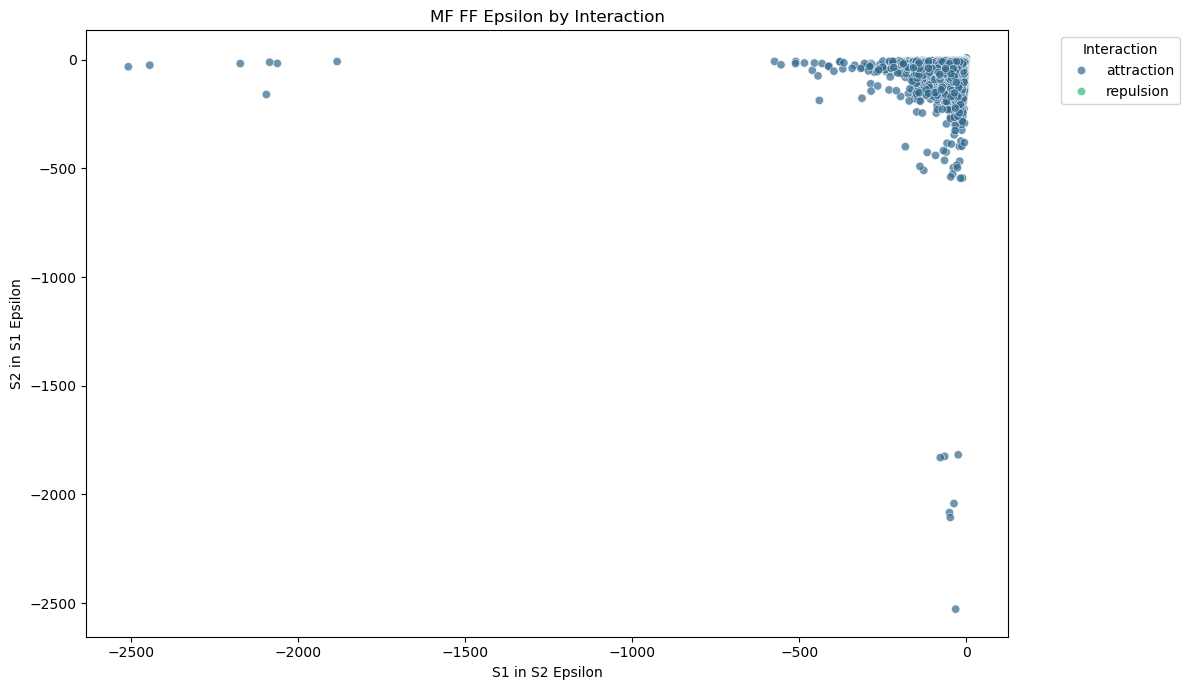

In [24]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='mf_s1_s2', y='mf_s2_s1',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('MF FF Epsilon by Interaction')
plt.xlabel('S1 in S2 Epsilon')
plt.ylabel('S2 in S1 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

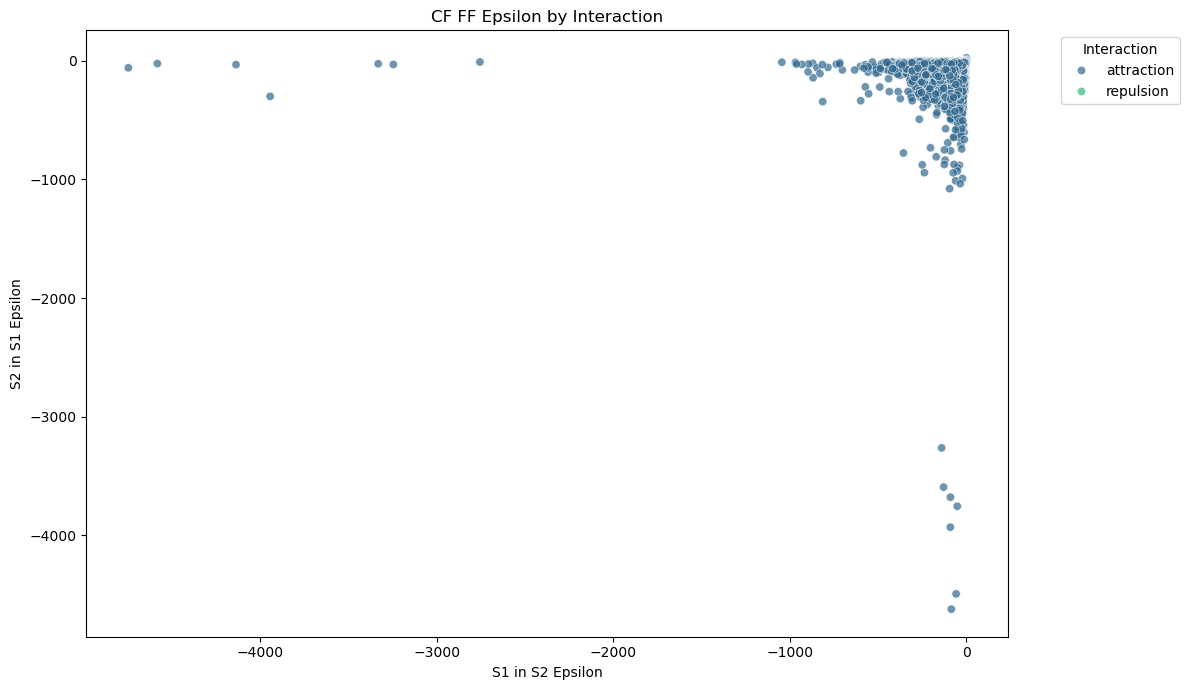

In [25]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='cf_s1_s2', y='cf_s2_s1',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('CF FF Epsilon by Interaction')
plt.xlabel('S1 in S2 Epsilon')
plt.ylabel('S2 in S1 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

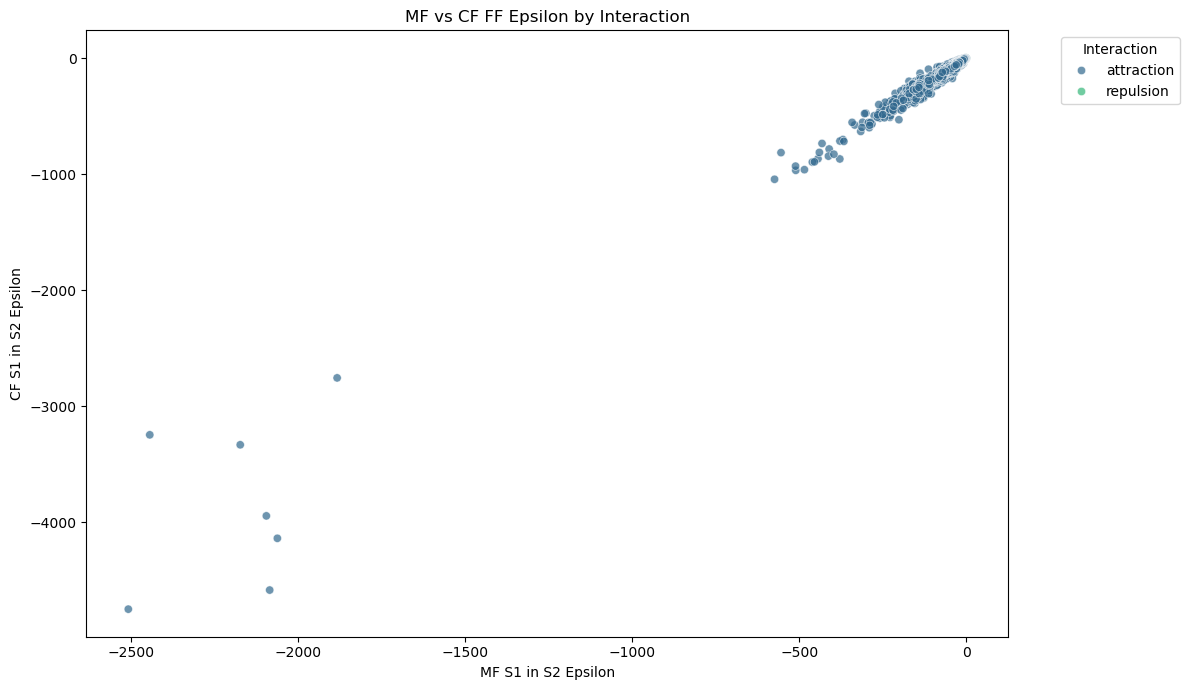

In [26]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='mf_s1_s2', y='cf_s1_s2',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('MF vs CF FF Epsilon by Interaction')
plt.xlabel('MF S1 in S2 Epsilon')
plt.ylabel('CF S1 in S2 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

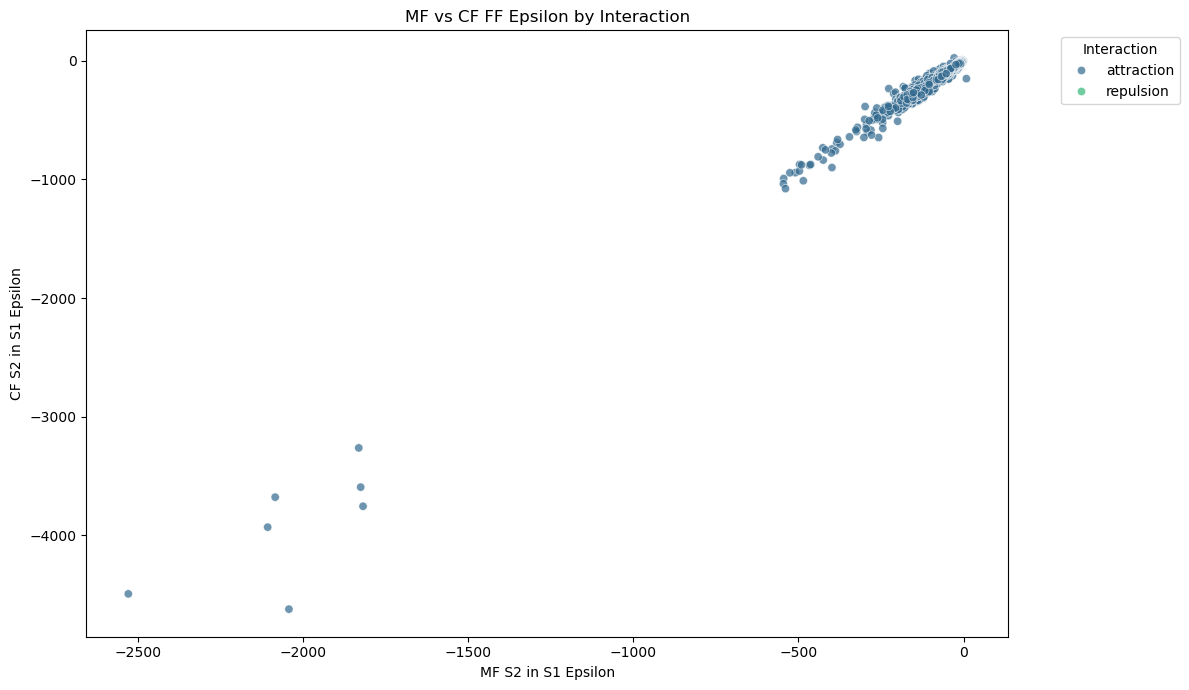

In [27]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='mf_s2_s1', y='cf_s2_s1',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('MF vs CF FF Epsilon by Interaction')
plt.xlabel('MF S2 in S1 Epsilon')
plt.ylabel('CF S2 in S1 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

In [28]:
df_melted = df.melt(id_vars=['s1_id', 's2_id'],
                    value_vars=['mf_s1_s2', 'mf_s2_s1', 'cf_s1_s2', 'cf_s2_s1'],
                    var_name='metric_type',
                    value_name='value')

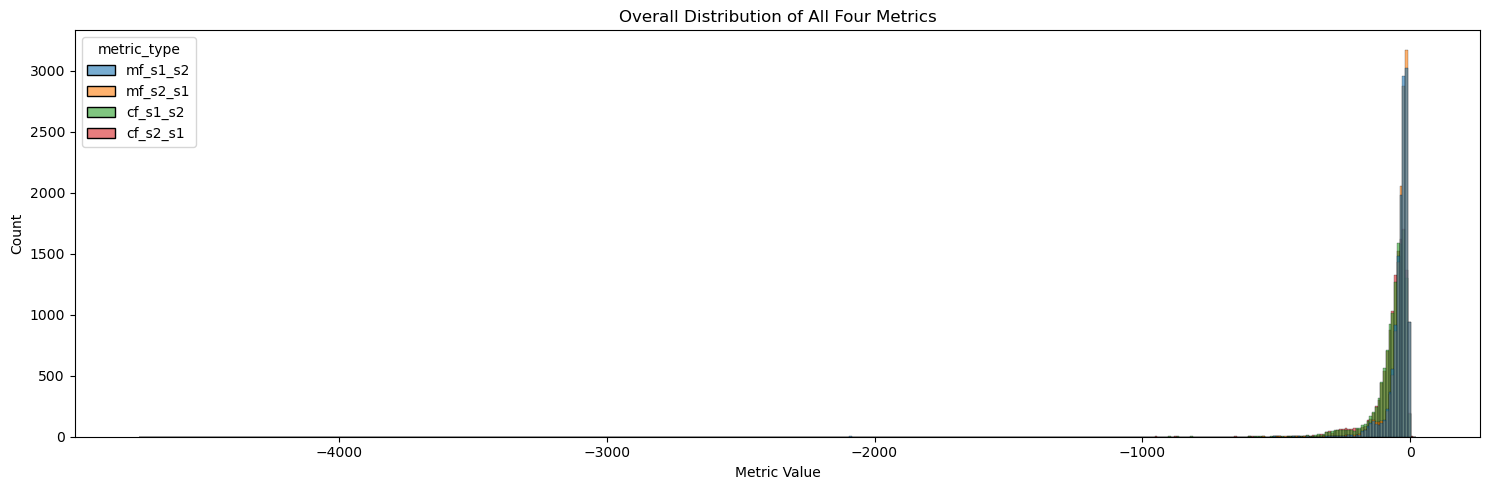

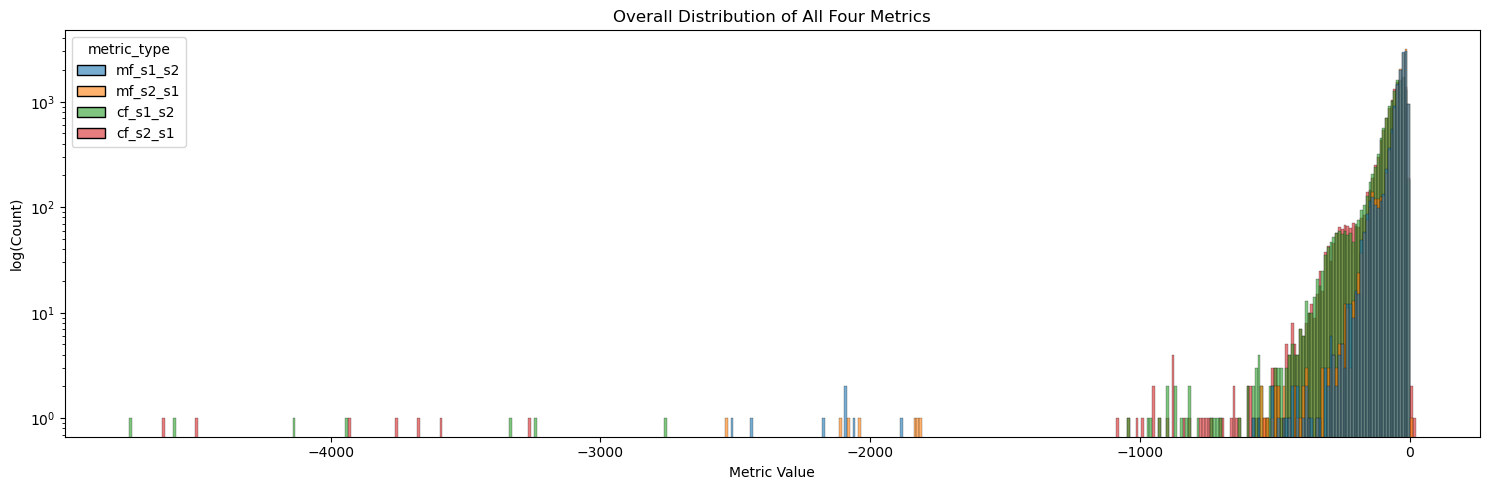

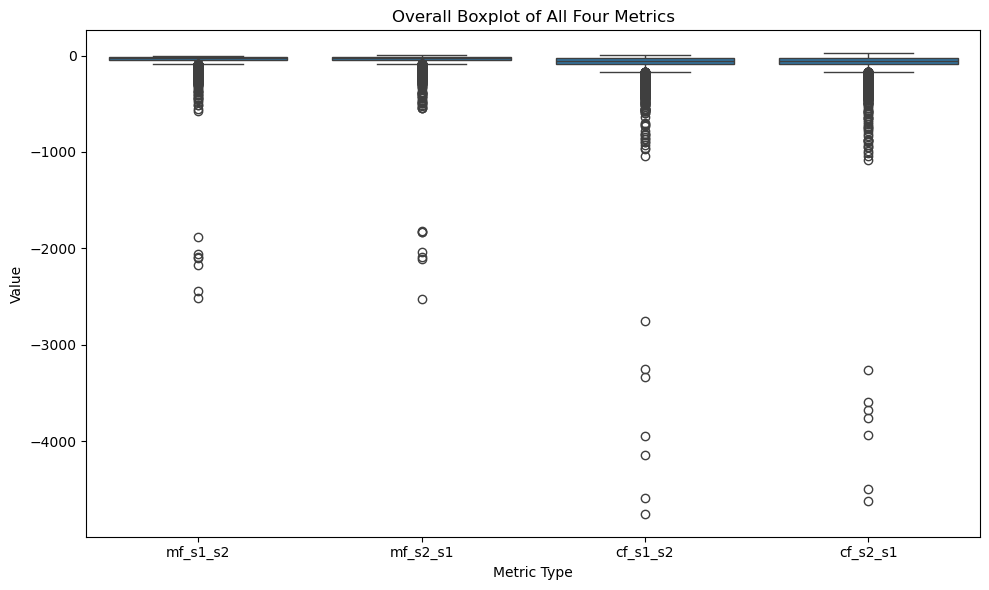

In [29]:
# Overall distribution of each metric
plt.figure(figsize=(15, 5))
ax = sns.histplot(data=df_melted, x='value', hue='metric_type', palette='tab10', alpha=0.6)
plt.title('Overall Distribution of All Four Metrics')
plt.xlabel('Metric Value')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Overall log distribution of each metric
plt.figure(figsize=(15, 5))
ax = sns.histplot(data=df_melted, x='value', hue='metric_type', palette='tab10', alpha=0.6)
plt.yscale('log')
plt.title('Overall Distribution of All Four Metrics')
plt.xlabel('Metric Value')
plt.ylabel('log(Count)')
plt.tight_layout()
plt.show()

# Boxplot comparing the overall distributions of the 4 metrics
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='metric_type', y='value')
plt.title('Overall Boxplot of All Four Metrics')
plt.xlabel('Metric Type')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

#  Negative random Control (Tiles to Full Protein)

In [12]:
input_filename_tiles_protein = 'results/negative_controls_random/finches_interaction_neg-control_tiles-to-full-protein_random_results.parquet'

df_tiles_protein = pq.read_table(input_filename_tiles_protein).to_pandas()
print(df_tiles_protein.columns)

df_tiles_protein_attractive = df_tiles_protein[df_tiles_protein['interaction_type'] == 'attraction']
df_tiles_protein_repulsive = df_tiles_protein[df_tiles_protein['interaction_type'] == 'repulsion']

print(len(df_tiles_protein_attractive))
print(len(df_tiles_protein_repulsive))

ArrowInvalid: Error creating dataset. Could not read schema from 'results/negative_controls_random/finches_interaction_neg-control_tiles-to-full-protein_random_results.parquet'. Is this a 'parquet' file?: Could not open Parquet input source 'results/negative_controls_random/finches_interaction_neg-control_tiles-to-full-protein_random_results.parquet': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.

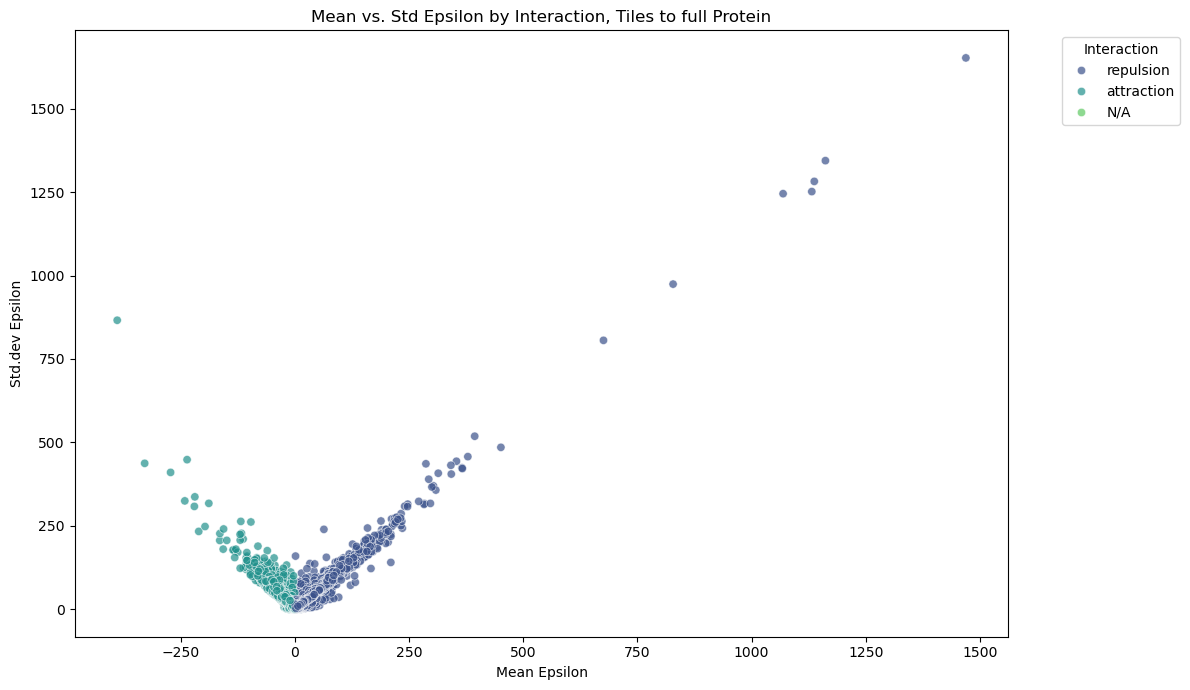

In [4]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_tiles_protein, x='mean_epsilon', y='std_epsilon',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('Mean vs. Std Epsilon by Interaction, Tiles to full Protein')
plt.xlabel('Mean Epsilon')
plt.ylabel('Std.dev Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

In [10]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_tiles_protein, x='mf_s1_s2', y='mf_s2_s1',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('MF FF Epsilon by Interaction, Tiles to full Protein')
plt.xlabel('S1 in S2 Epsilon')
plt.ylabel('S2 in S1 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

NameError: name 'df_tiles_protein' is not defined

<Figure size 1200x700 with 0 Axes>

In [11]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_tiles_protein, x='cf_s1_s2', y='cf_s2_s1',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('CF FF Epsilon by Interaction, Tiles to full Protein')
plt.xlabel('S1 in S2 Epsilon')
plt.ylabel('S2 in S1 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

NameError: name 'df_tiles_protein' is not defined

<Figure size 1200x700 with 0 Axes>

In [12]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_tiles_protein, x='mf_s1_s2', y='cf_s1_s2',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('MF vs CF FF Epsilon by Interaction, Tiles to full Protein')
plt.xlabel('MF S1 in S2 Epsilon')
plt.ylabel('CF S1 in S2 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

NameError: name 'df_tiles_protein' is not defined

<Figure size 1200x700 with 0 Axes>

In [13]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_tiles_protein, x='mf_s2_s1', y='cf_s2_s1',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('MF vs CF FF Epsilon by Interaction, Tiles to full Protein')
plt.xlabel('MF S2 in S1 Epsilon')
plt.ylabel('CF S2 in S1 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

NameError: name 'df_tiles_protein' is not defined

<Figure size 1200x700 with 0 Axes>

In [14]:
df_tiles_protein_melted = df_tiles_protein.melt(id_vars=['s1_id', 's2_id'],
                    value_vars=['mf_s1_s2', 'mf_s2_s1', 'cf_s1_s2', 'cf_s2_s1'],
                    var_name='metric_type',
                    value_name='value')

NameError: name 'df_tiles_protein' is not defined

In [15]:
# Overall distribution of each metric
plt.figure(figsize=(15, 5))
ax = sns.histplot(data=df_tiles_protein_melted, x='value', hue='metric_type', palette='tab10', alpha=0.6)
plt.title('Overall Distribution of All Four Metrics, Tiles to full Protein')
plt.xlabel('Metric Value')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Overall log distribution of each metric
plt.figure(figsize=(15, 5))
ax = sns.histplot(data=df_tiles_protein_melted, x='value', hue='metric_type', palette='tab10', alpha=0.6)
plt.yscale('log')
plt.title('Overall Distribution of All Four Metrics, Tiles to full Protein')
plt.xlabel('Metric Value')
plt.ylabel('log(Count)')
plt.tight_layout()
plt.show()

# Boxplot comparing the overall distributions of the 4 metrics
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_tiles_protein_melted, x='metric_type', y='value')
plt.title('Overall Boxplot of All Four Metrics, Tiles to full Protein')
plt.xlabel('Metric Type')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

NameError: name 'df_tiles_protein_melted' is not defined

<Figure size 1500x500 with 0 Axes>

#  Negative random Control (Tiles to Tiles)

In [13]:
input_filename_tiles_tiles = 'results/negative_controls_random/finches_interaction_neg-control_tiles-to-tiles_random_results.parquet'

df_tiles_tiles = pq.read_table(input_filename_tiles_tiles).to_pandas()
print(df_tiles_tiles.columns)

df_tiles_tiles_attractive = df_tiles_tiles[df_tiles_tiles['interaction_type'] == 'attraction']
df_tiles_tiles_repulsive = df_tiles_tiles[df_tiles_tiles['interaction_type'] == 'repulsion']

print(len(df_tiles_tiles_attractive))
print(len(df_tiles_tiles_repulsive))

Index(['s1_id', 's2_id', 'mf_s1_s2', 'mf_s2_s1', 'cf_s1_s2', 'cf_s2_s1',
       'mean_epsilon', 'std_epsilon', 'interaction_type'],
      dtype='object')
14468275
538319


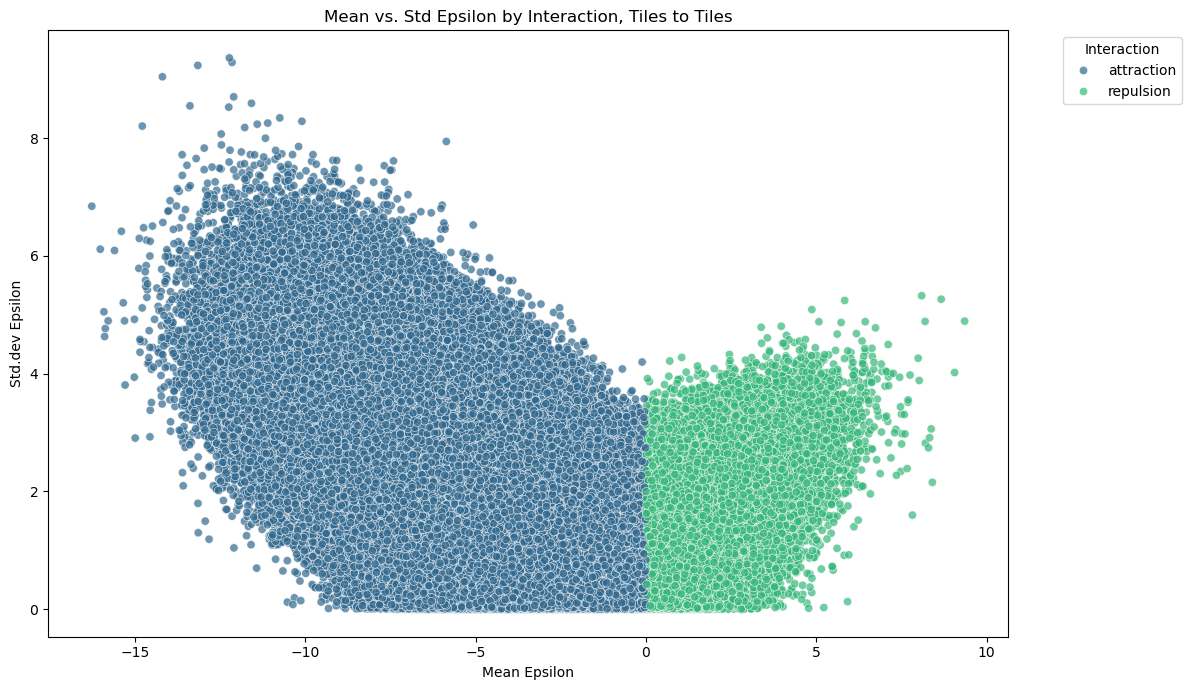

In [14]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_tiles_tiles, x='mean_epsilon', y='std_epsilon',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('Mean vs. Std Epsilon by Interaction, Tiles to Tiles')
plt.xlabel('Mean Epsilon')
plt.ylabel('Std.dev Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

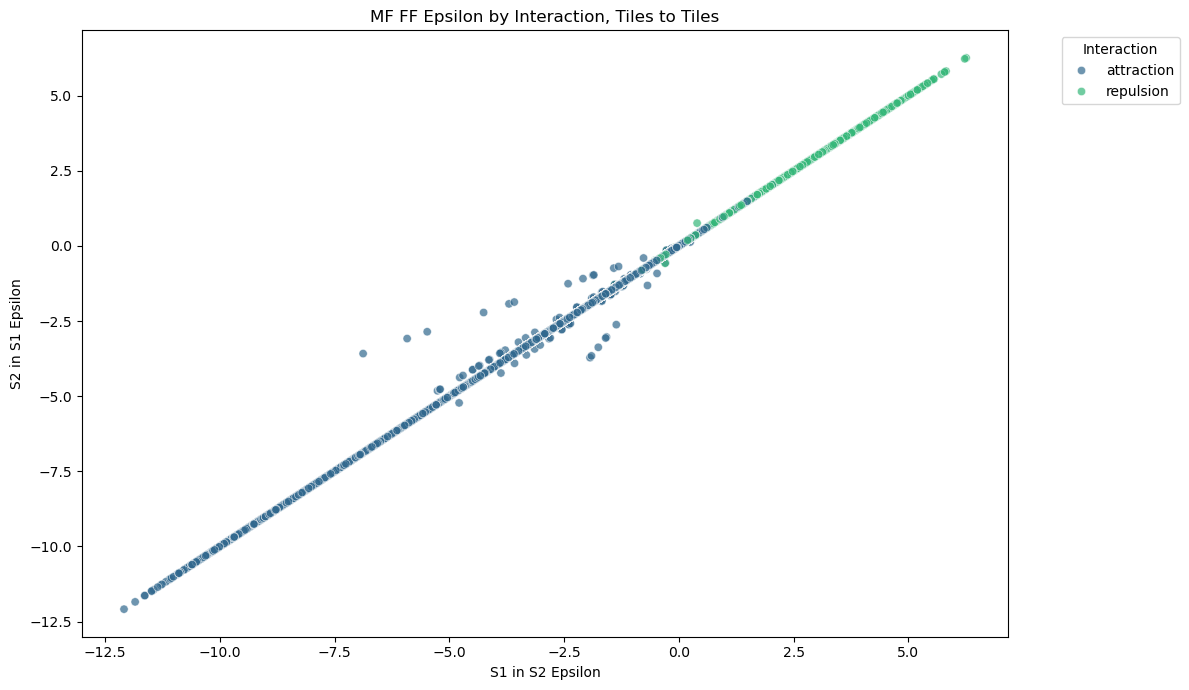

In [15]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_tiles_tiles, x='mf_s1_s2', y='mf_s2_s1',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('MF FF Epsilon by Interaction, Tiles to Tiles')
plt.xlabel('S1 in S2 Epsilon')
plt.ylabel('S2 in S1 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

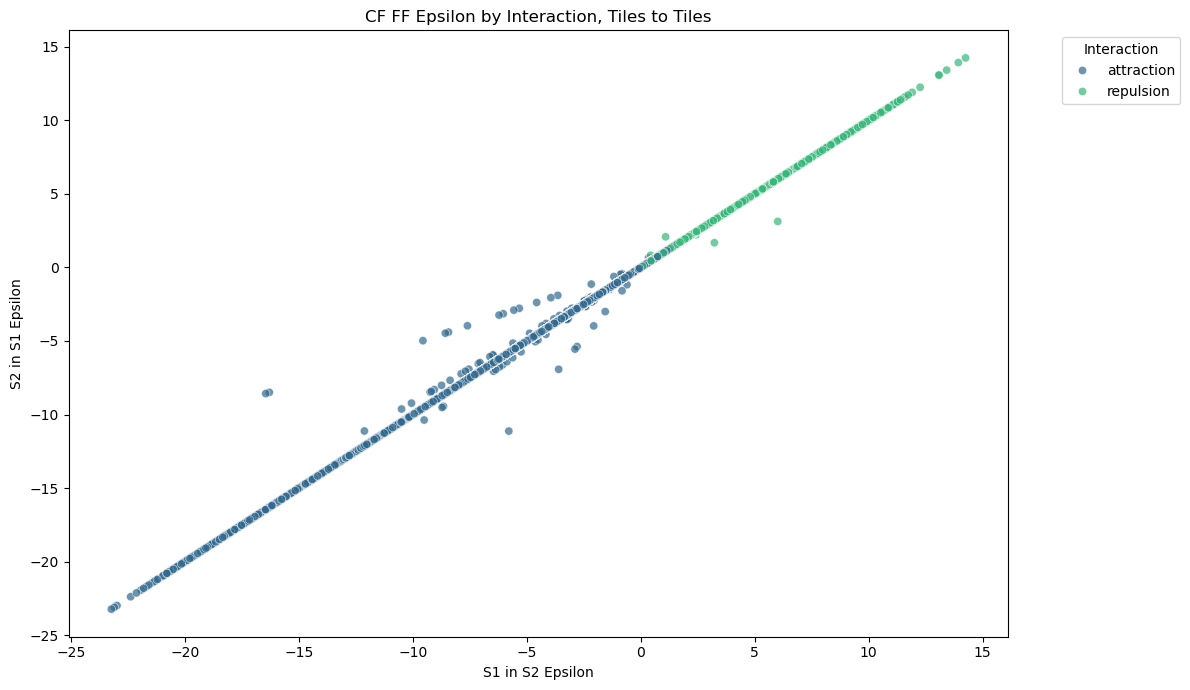

In [16]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_tiles_tiles, x='cf_s1_s2', y='cf_s2_s1',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('CF FF Epsilon by Interaction, Tiles to Tiles')
plt.xlabel('S1 in S2 Epsilon')
plt.ylabel('S2 in S1 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

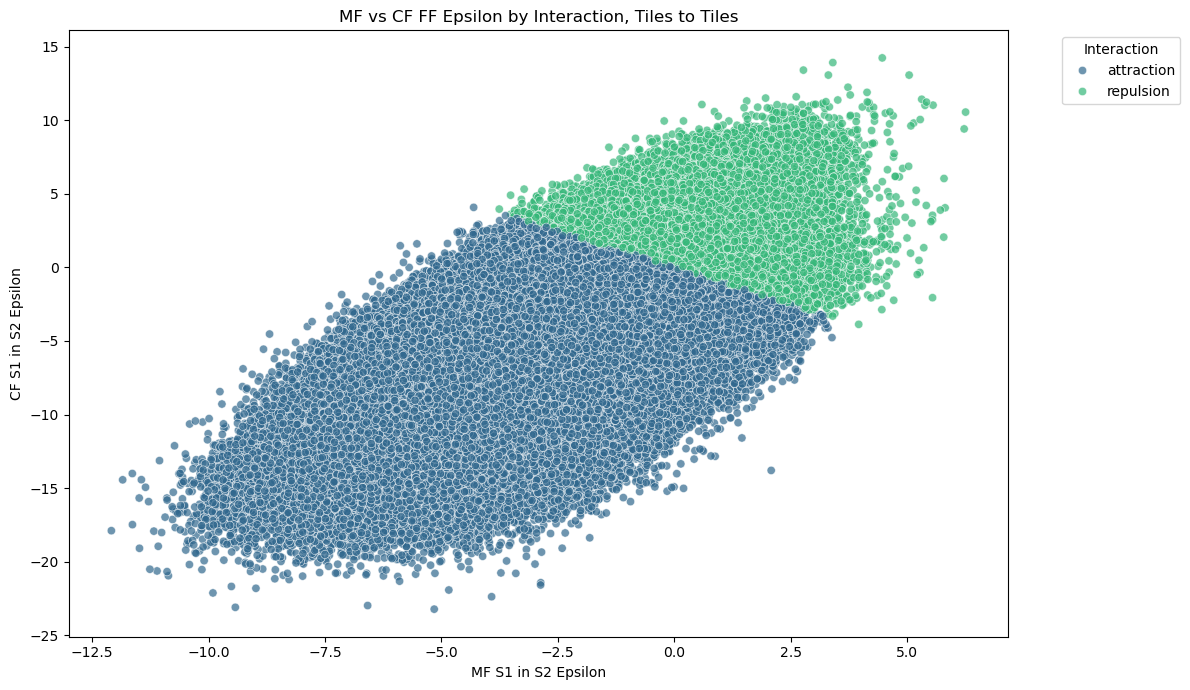

In [17]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_tiles_tiles, x='mf_s1_s2', y='cf_s1_s2',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('MF vs CF FF Epsilon by Interaction, Tiles to Tiles')
plt.xlabel('MF S1 in S2 Epsilon')
plt.ylabel('CF S1 in S2 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

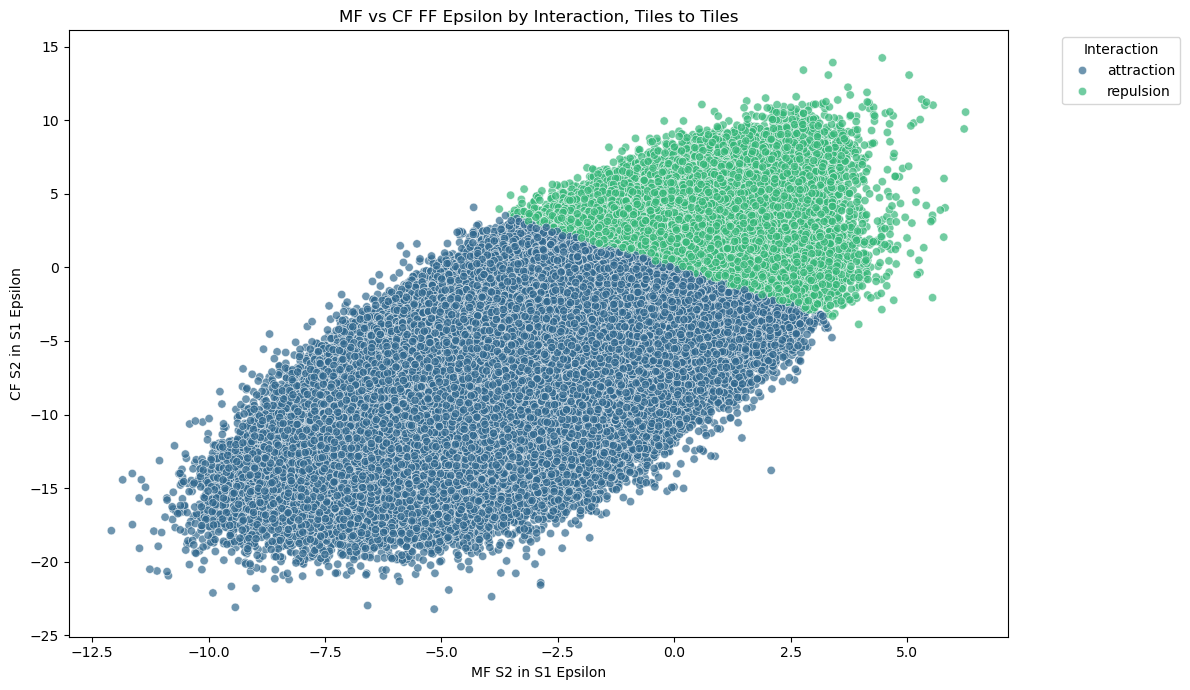

In [18]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_tiles_tiles, x='mf_s2_s1', y='cf_s2_s1',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('MF vs CF FF Epsilon by Interaction, Tiles to Tiles')
plt.xlabel('MF S2 in S1 Epsilon')
plt.ylabel('CF S2 in S1 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

In [19]:
df_tiles_tiles_melted = df_tiles_tiles.melt(id_vars=['s1_id', 's2_id'],
                    value_vars=['mf_s1_s2', 'mf_s2_s1', 'cf_s1_s2', 'cf_s2_s1'],
                    var_name='metric_type',
                    value_name='value')

/projectnb/cancergrp/Philipp/.conda/envs/jupyter_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


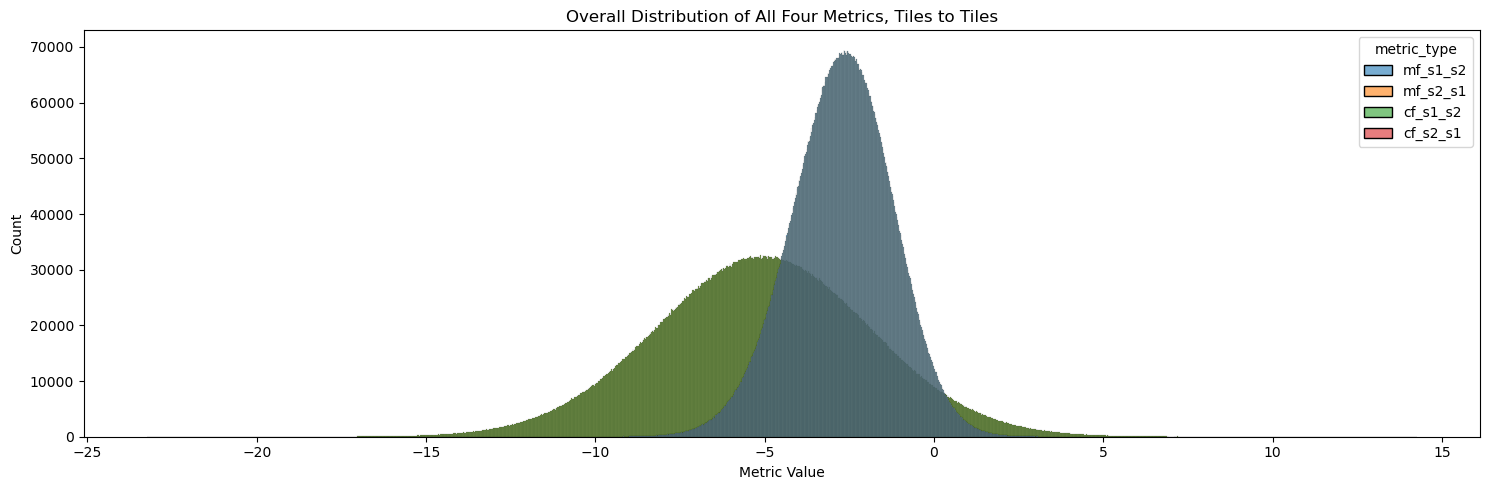

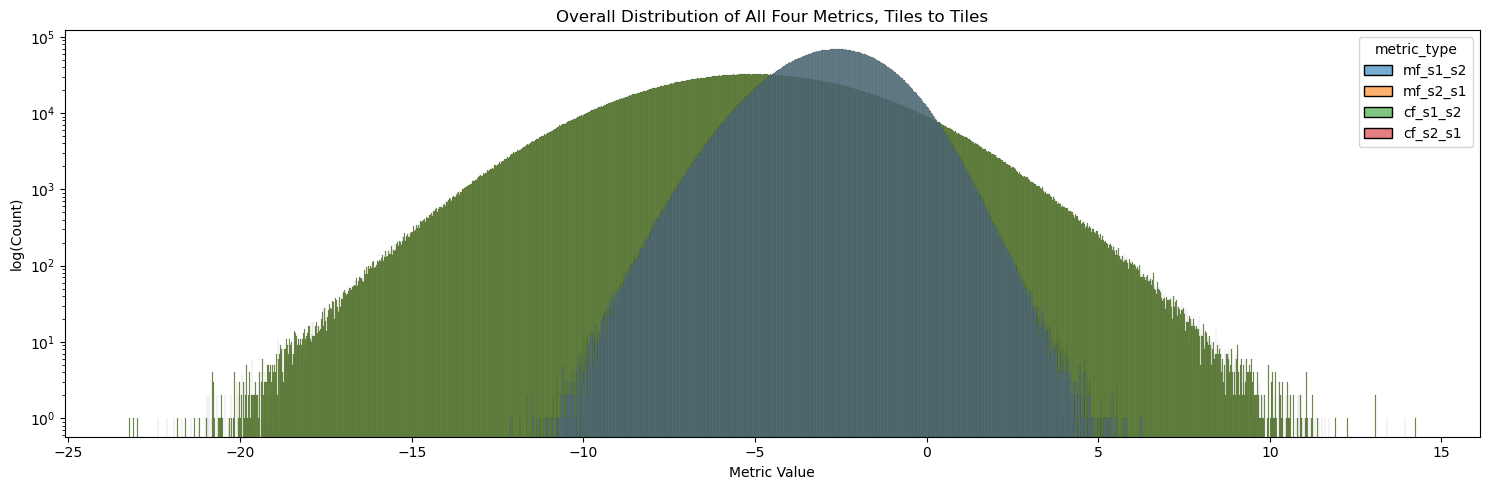

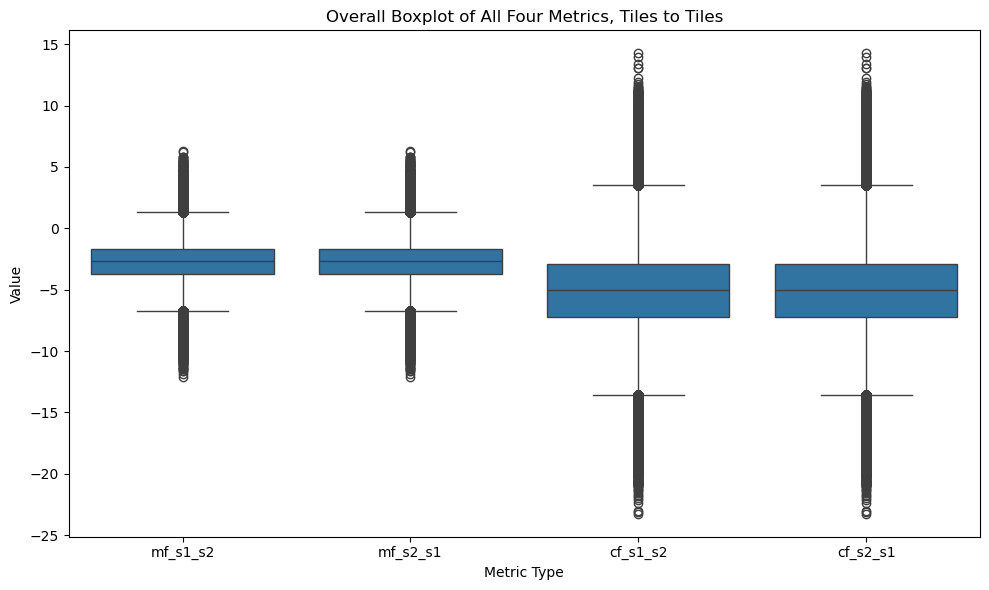

In [20]:
# Overall distribution of each metric
plt.figure(figsize=(15, 5))
ax = sns.histplot(data=df_tiles_tiles_melted, x='value', hue='metric_type', palette='tab10', alpha=0.6)
plt.title('Overall Distribution of All Four Metrics, Tiles to Tiles')
plt.xlabel('Metric Value')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Overall log distribution of each metric
plt.figure(figsize=(15, 5))
ax = sns.histplot(data=df_tiles_tiles_melted, x='value', hue='metric_type', palette='tab10', alpha=0.6)
plt.yscale('log')
plt.title('Overall Distribution of All Four Metrics, Tiles to Tiles')
plt.xlabel('Metric Value')
plt.ylabel('log(Count)')
plt.tight_layout()
plt.show()

# Boxplot comparing the overall distributions of the 4 metrics
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_tiles_tiles_melted, x='metric_type', y='value')
plt.title('Overall Boxplot of All Four Metrics, Tiles to Tiles')
plt.xlabel('Metric Type')
plt.ylabel('Value')
plt.tight_layout()
plt.show()